- https://facebook.github.io/prophet/docs/quick_start.html#python-api
- http://datalove.hatenadiary.jp/entry/python/prophet/getting-started-with-facebook-machine-learning-library-for-time-series-analysis
- https://www.slideshare.net/hoxo_m/prophet-facebook-76285278
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [15]:
# Python
df = pd.read_csv('example_wp_peyton_manning.csv')

In [17]:
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


In [18]:
df.tail()

,ds,y
2900,2016-01-16,2483
2901,2016-01-17,10656
2902,2016-01-18,30754
2903,2016-01-19,9190
2904,2016-01-20,7269


/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAmincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


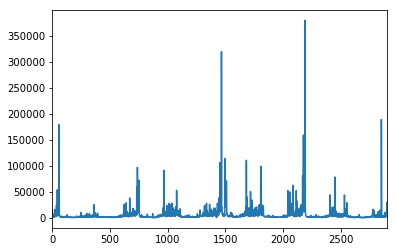

In [19]:
df["y"].plot()

In [20]:
# 対数変換(値が大きくなるとばらつきも大きくなることの対処)
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [21]:
m = Prophet()
m.fit(df)

In [22]:
# periodは予測期間
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.440715,8.936904
3266,2017-01-16,8.534139,7.841487,9.224089
3267,2017-01-17,8.321541,7.595532,9.025827
3268,2017-01-18,8.154138,7.436349,8.904860
3269,2017-01-19,8.166091,7.450494,8.814814


/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAmincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


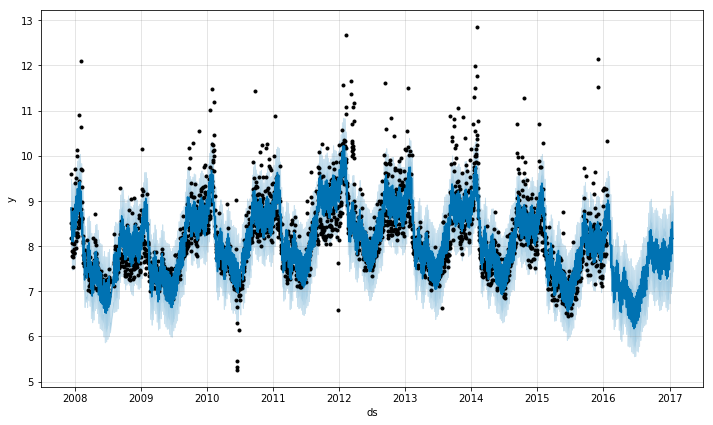

In [24]:
m.plot(forecast);

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAmincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


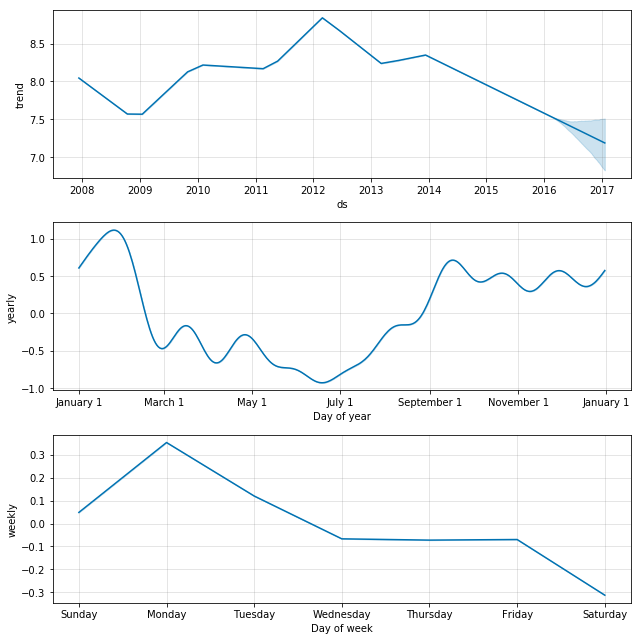

In [25]:
m.plot_components(forecast)